Importing Librabies

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import sklearn.preprocessing as preprocessing
from operator import itemgetter
from sklearn.metrics import mean_squared_error as mse
import keras
import seaborn as sns
sns.set()
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [170]:
disaster_data= pd.read_csv('/content/1900_2021_DISASTERS.xlsx - emdat data.csv')

Convert and merge Dates together

In [171]:
# Convert the 'Start Day' column to a datetime type
disaster_data['Start Day'] = pd.to_datetime(disaster_data['Start Day'], format='%d')

# Format the 'Start Day' column as two digits
disaster_data['Start Day'] = disaster_data['Start Day'].dt.strftime('%d')

In [172]:
# Convert the 'Start Month' column to a datetime type
disaster_data['Start Month'] = pd.to_datetime(disaster_data['Start Month'], format='%m')

# Format the 'Start Month' column as two digits
disaster_data['Start Month'] = disaster_data['Start Month'].dt.strftime('%m')

In [173]:
# Convert the 'Start Year' column to a datetime type
disaster_data['End Day'] = pd.to_datetime(disaster_data['End Day'], format='%d')

# Format the 'Start Day' column as two digits
disaster_data['End Day'] = disaster_data['End Day'].dt.strftime('%d')

In [174]:
# Convert the 'End Month' column to a datetime type
disaster_data['End Month'] = pd.to_datetime(disaster_data['End Month'], format='%m')

# Format the 'End Month' column as two digits
disaster_data['End Month'] = disaster_data['End Month'].dt.strftime('%m')

In [175]:
disaster_data['Date'] = pd.to_datetime(disaster_data[['Year', 'Start Month', 'Start Day']].astype(str).apply(' '.join, axis=1), format='%Y %m %d', errors='ignore')

In [176]:
disaster_data1 = disaster_data[(disaster_data['Date'] >= '2010-01-01') & (disaster_data['Date'] <= '2021-09-07')]

In [177]:
disaster_data['End Date'] = pd.to_datetime(disaster_data[['End Year', 'End Month', 'End Day']].astype(str).apply(' '.join, axis=1), format='%Y %m %d', errors='ignore')

Cut Dates to suit the Stock data

In [178]:
disaster_data1 = disaster_data[(disaster_data['End Date'] >= '2010-01-01') & (disaster_data['End Date'] <= '2023-09-07')]

In [179]:
pd.options.mode.copy_on_write = True

In [180]:
columns_to_delete = ['Admin1 Code','Location','Disaster Group','Dis Mag Value','Continent','Dis Mag Scale','Disaster Subtype','Latitude','Event Name','Disaster Subgroup','Admin2 Code', 'Origin','Disaster Subsubtype', 'Appeal', 'River Basin','Total Affected','No Injured','No Affected','Adm Level','OFDA Response','Declaration','Seq', 'ISO', 'Geo Locations', 'CPI', 'Aid Contribution', 'Associated Dis', 'Associated Dis2', 'Local Time', 'Region', 'Longitude','ISO','Glide', 'No Homeless']
disaster_data1.drop(columns=columns_to_delete, inplace=True)


In [181]:
# Check which columns are present in the DataFrame
existing_columns = disaster_data1.columns

# Modify the columns_to_delete list to include only existing columns
columns_to_delete = [col for col in columns_to_delete if col in existing_columns]

# Drop the specified columns from the DataFrame
disaster_data1.drop(columns=columns_to_delete, inplace=True)


In [182]:
# Replace 'nan' values in the 'End Date' column with a placeholder
disaster_data1['End Date'].fillna('9999-12-31', inplace=True)

# Convert 'End Date' column to datetime format
disaster_data1['End Date'] = pd.to_datetime(disaster_data1['End Date'], errors='coerce')

# Extract year from 'End Date' column
disaster_data1['Year'] = disaster_data1['End Date'].dt.year

# Replace NaN values in the 'Year' column with the corresponding year extracted from the 'End Date' column
disaster_data1['Year'].fillna(pd.to_datetime(disaster_data1['End Date']).dt.year, inplace=True)

# Drop the 'End Date' column if it's no longer needed
disaster_data1.drop(columns=['End Date'], inplace=True)

# Drop rows with NaN values in the 'Year' column
disaster_data1.dropna(subset=['Year'], inplace=True)


<ipython-input-182-3fec5a9ae6de>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  disaster_data1['End Date'] = pd.to_datetime(disaster_data1['End Date'], errors='coerce')


In [183]:
columns_to_delete = ['Year','Start Year', 'Start Month','Start Day','End Day','End Year', 'End Month']
disaster_data1.drop(columns=columns_to_delete, inplace=True)

In [184]:
disaster_data1.dropna(inplace=True)

In [185]:
disaster_data1.isnull().sum()

Disaster Type                 0
Country                       0
Total Deaths                  0
Insured Damages ('000 US$)    0
Total Damages ('000 US$)      0
Date                          0
dtype: int64

In [186]:
disaster_data1.head(10)

,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),Date
11372,Flood,Australia,35.0,2500000.0,7300000.0,2010 12 25
11434,Flood,Colombia,418.0,14000.0,1000000.0,2010 04 06
11516,Flood,Brazil,900.0,50000.0,1000000.0,2011 01 11
11522,Flood,China,467.0,195000.0,6400000.0,2011 06 01
11530,Storm,Australia,1.0,1300000.0,2500000.0,2011 02 02
11554,Flood,Canada,5.0,157000.0,800000.0,2011 04 04
11576,Earthquake,Spain,10.0,100000.0,200000.0,2011 05 11
11933,Earthquake,Japan,19846.0,37500000.0,210000000.0,2011 03 11
11943,Flood,Thailand,813.0,10000000.0,40000000.0,2011 08 05
11948,Storm,United States of America (the),39.0,1425000.0,1900000.0,2011 01 31


In [187]:
disaster_data1.shape

(262, 6)

Upload Stock data

In [188]:
stock_data= pd.read_csv('/content/sp500_stocks.csv')

In [189]:
stock_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,52.961578,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,53.712658,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,53.751171,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,54.129951,84.320000,84.320000,83.300003,83.690002,3405800.0


In [190]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')


In [191]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795710 entries, 0 to 1795709
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Symbol     object        
 2   Adj Close  float64       
 3   Close      float64       
 4   High       float64       
 5   Low        float64       
 6   Open       float64       
 7   Volume     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 109.6+ MB


In [192]:
stock_data.dropna(inplace=True)

In [193]:
stock_data.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [194]:
# Descriptive statistics for stock market data (adjust columns as needed)
print("Stock Market Data Statistics:")
print(stock_data[["Open", "High", "Low", 'Close', "Adj Close"]].describe())  # Focus on specific columns

Stock Market Data Statistics:
               Open          High           Low         Close     Adj Close
count  1.715797e+06  1.715797e+06  1.715797e+06  1.715797e+06  1.715797e+06
mean   1.027161e+02  1.038656e+02  1.015523e+02  1.027393e+02  9.569916e+01
std    1.956943e+02  1.980831e+02  1.933960e+02  1.957900e+02  1.956794e+02
min    7.000000e-01  7.100000e-01  6.500000e-01  7.000000e-01  7.000000e-01
25%    3.521000e+01  3.560000e+01  3.480750e+01  3.521000e+01  2.957954e+01
50%    6.192038e+01  6.256000e+01  6.126558e+01  6.193250e+01  5.378028e+01
75%    1.114400e+02  1.126400e+02  1.102298e+02  1.114700e+02  1.021600e+02
max    7.760000e+03  7.825000e+03  7.679600e+03  7.709270e+03  7.709270e+03


In [195]:
disaster_data1['Date'].value_counts()

Date
2017 09 08    4
2016 04 16    3
2017 01 18    2
2015 11 25    2
2012 09 07    2
             ..
2013 12 01    1
2013 04 07    1
2013 03 18    1
2013 06 06    1
2020 08 16    1
Name: count, Length: 236, dtype: int64

Delete Dates in datset that have nan in it

In [196]:
# Drop rows with NaN values in the 'Date' column
disaster_data1.dropna(subset=['Date'], inplace=True)


In [197]:
# Specify the indices of the rows to be deleted
indices_to_delete = [14843, 15581]

# Drop rows with the specified indices
disaster_data1.drop(indices_to_delete, inplace=True)


In [198]:
disaster_data1[disaster_data1['Date'].str.contains('nan')]

,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),Date


In [199]:
disaster_data1['Date'] = pd.to_datetime(disaster_data1['Date'])


Top 10 Countries with the Most Natural Disasters

<ipython-input-200-cd055071f078>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=top_10_countries, palette='viridis')


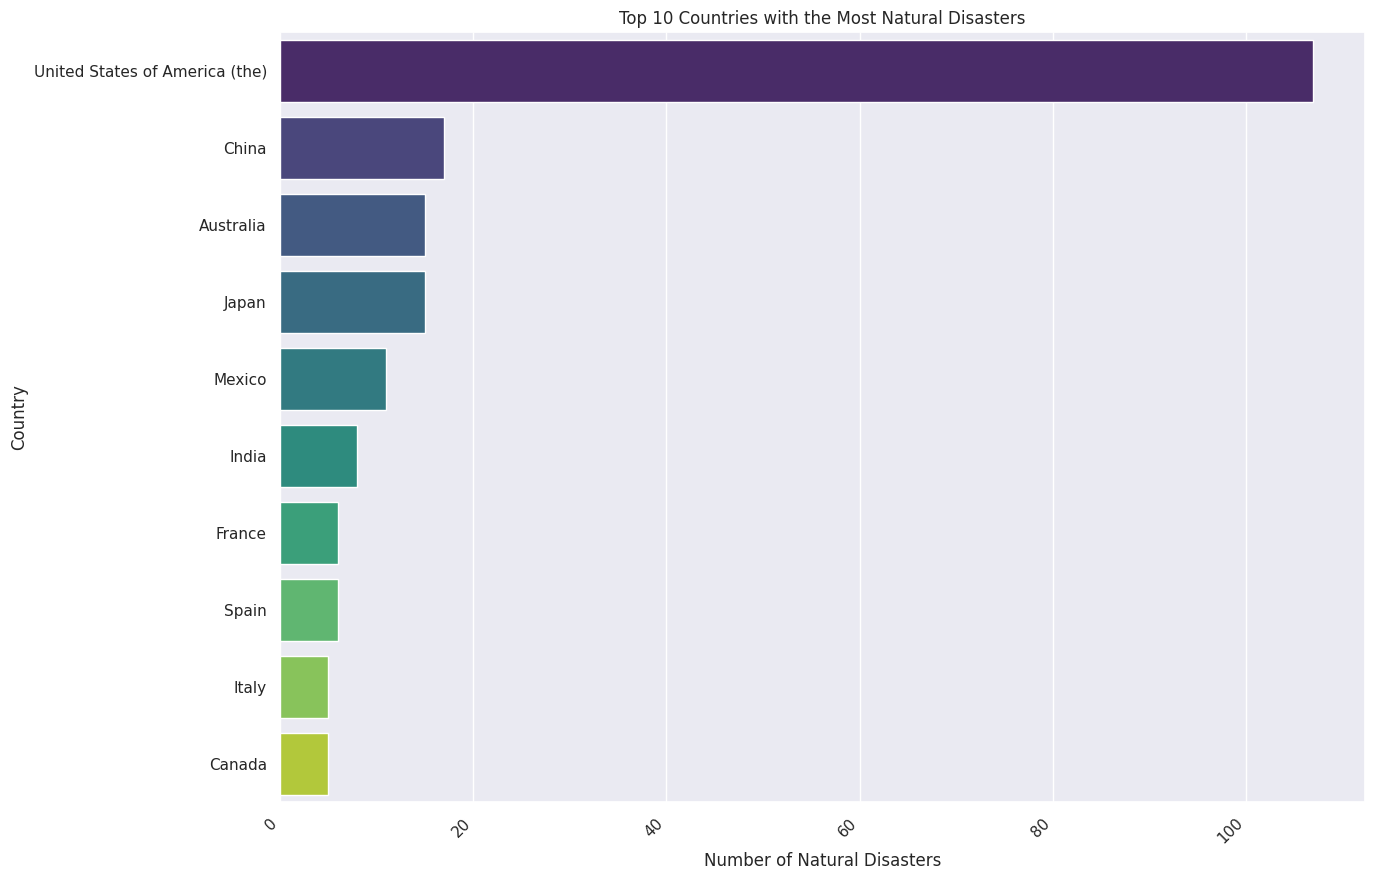

In [200]:
# Count occurrences of each country
country_counts = disaster_data1['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Sort the DataFrame by count in descending order
country_counts = country_counts.sort_values(by='Count', ascending=False)

# Select only the first 10 rows (top 10 countries)
top_10_countries = country_counts.head(10)

# Plotting the bar chart with adjusted size and rotated labels
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries with the Most Natural Disasters')
plt.xlabel('Number of Natural Disasters')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [201]:
disaster_data1 = disaster_data1.dropna()  # Fix typo: inplace=True is missing

In [202]:
merged_data = pd.merge(stock_data, disaster_data1, on='Date', how='inner')


In [203]:
merged_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$)
0,2010-04-06,MMM,54.504780,84.349998,84.470001,83.550003,83.900002,3208500.0,Flood,Colombia,418.0,14000.0,1000000.0
1,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1264800.0,Flood,Colombia,418.0,14000.0,1000000.0
2,2010-04-06,ABT,18.614557,25.352633,25.486977,25.227884,25.367025,15102334.0,Flood,Colombia,418.0,14000.0,1000000.0
3,2010-04-06,ACN,31.914417,41.520000,42.310001,41.450001,42.020000,5802000.0,Flood,Colombia,418.0,14000.0,1000000.0
4,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,4211400.0,Flood,Colombia,418.0,14000.0,1000000.0


In [204]:
merged_data.isnull().sum(axis=0)

Date                          0
Symbol                        0
Adj Close                     0
Close                         0
High                          0
Low                           0
Open                          0
Volume                        0
Disaster Type                 0
Country                       0
Total Deaths                  0
Insured Damages ('000 US$)    0
Total Damages ('000 US$)      0
dtype: int64

In [205]:

print("Natural Disaster Statistics:")
print(merged_data.describe(include="all"))  # Include categorical data

Natural Disaster Statistics:
                                 Date Symbol     Adj Close         Close  \
count                           81203  81203  81203.000000  81203.000000   
unique                            NaN    499           NaN           NaN   
top                               NaN    MMM           NaN           NaN   
freq                              NaN    171           NaN           NaN   
mean    2015-05-20 14:13:09.044739584    NaN     68.377006     77.128085   
min               2010-04-06 00:00:00    NaN      0.730000      0.730000   
25%               2013-01-17 00:00:00    NaN     26.203615     32.274815   
50%               2015-09-09 00:00:00    NaN     44.941734     53.470001   
75%               2017-06-07 00:00:00    NaN     75.805565     87.330002   
max               2021-03-18 00:00:00    NaN   4421.850098   4421.850098   
std                               NaN    NaN    121.302378    122.362603   

                High           Low          Open        Vo

In [206]:
merged_data.shape

(81203, 13)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

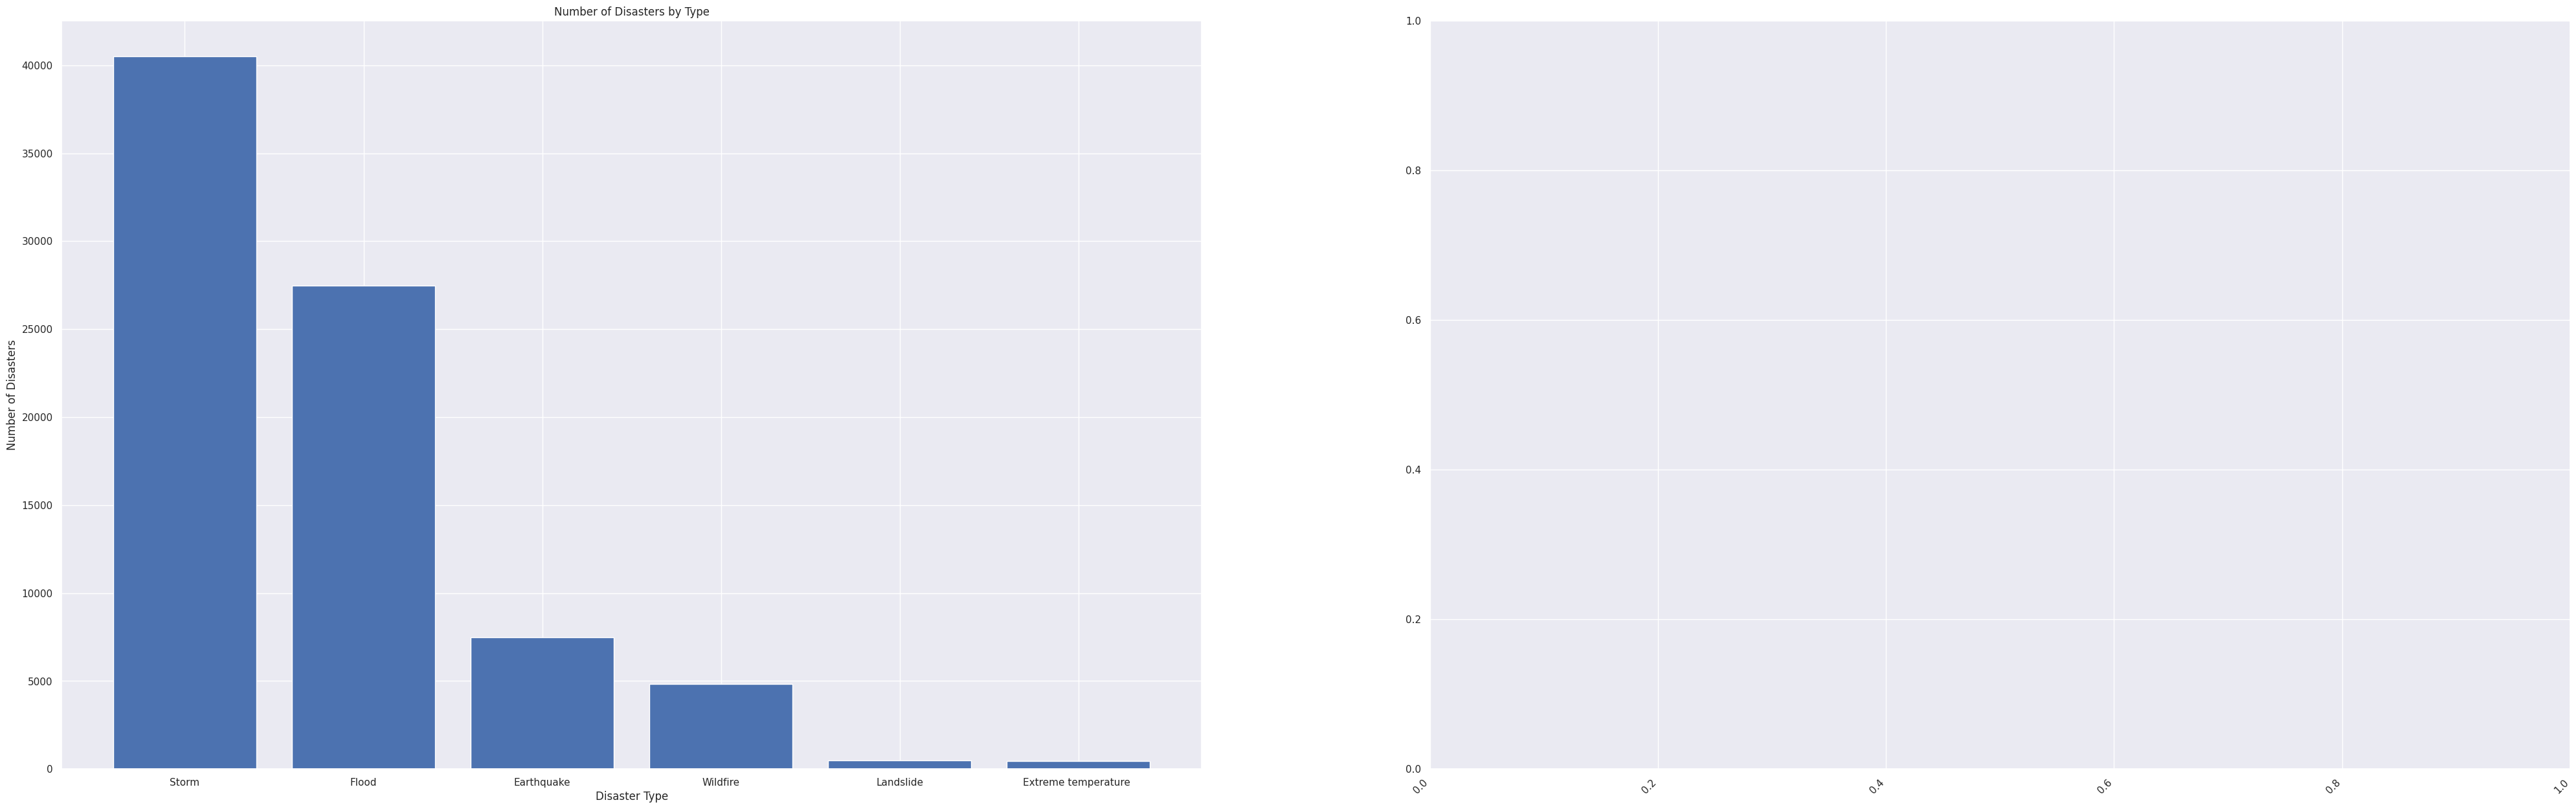

In [207]:
# Assuming columns named 'Disaster_Type' (or similar) and 'Fatalities'
disaster_counts = merged_data['Disaster Type'].value_counts()  # Count disasters by type
total_fatalities = merged_data['Total Deaths'].sum()  # Total lives lost

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50,15))

# Subplot 1: Disaster Count Bar Plot
ax1.bar(disaster_counts.index, disaster_counts.values)
ax1.set_xlabel("Disaster Type")
ax1.set_ylabel("Number of Disasters")
ax1.set_title("Number of Disasters by Type")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability


In [208]:

# Function to calculate average return within a window
def calculate_avg_return(window_data):
  # Assuming 'Adj Close' column exists for adjusted closing prices
  daily_returns = window_data['Adj Close'].pct_change()
  return daily_returns.mean()

print("Imports and function definition completed.")


Imports and function definition completed.


In [209]:
# Define pre-event, event, and post-event window sizes (in days)
pre_window = 5  # Adjust as needed
event_window = 1  # Adjust as needed (consider disaster duration)
post_window = 10  # Adjust as needed

print(f"Pre-event window: {pre_window} days")
print(f"Event window: {event_window} days")
print(f"Post-event window: {post_window} days")

Pre-event window: 5 days
Event window: 1 days
Post-event window: 10 days


In [210]:
# Filter data for disaster events (assuming 'Disaster Type' is not null)
disaster_data = merged_data[merged_data['Disaster Type'].notnull()]

print(f"Number of disaster events found: {len(disaster_data)}")


Number of disaster events found: 81203


In [211]:
# Group by Disaster Type and Country for separate analysis (optional)
disaster_groups = disaster_data.groupby(['Disaster Type', 'Country'])

if len(disaster_groups) > 1:
  print("Grouping by Disaster Type and Country:")
  for group_name, group_data in disaster_groups:
    print(f"  - Group: {group_name}")
else:
  print("Data not grouped. Iterating directly through disaster data.")
  disaster_groups = disaster_data  # Assign disaster_data to continue iterating


Grouping by Disaster Type and Country:
  - Group: ('Earthquake', 'Chile')
  - Group: ('Earthquake', 'China')
  - Group: ('Earthquake', 'Costa Rica')
  - Group: ('Earthquake', 'Italy')
  - Group: ('Earthquake', 'Japan')
  - Group: ('Earthquake', 'Mexico')
  - Group: ('Earthquake', 'New Zealand')
  - Group: ('Earthquake', 'Philippines (the)')
  - Group: ('Earthquake', 'Puerto Rico')
  - Group: ('Earthquake', 'Spain')
  - Group: ('Earthquake', 'Thailand')
  - Group: ('Earthquake', 'Turkey')
  - Group: ('Extreme temperature ', 'Mexico')
  - Group: ('Flood', 'Argentina')
  - Group: ('Flood', 'Australia')
  - Group: ('Flood', 'Brazil')
  - Group: ('Flood', 'Canada')
  - Group: ('Flood', 'Chile')
  - Group: ('Flood', 'China')
  - Group: ('Flood', 'Colombia')
  - Group: ('Flood', 'France')
  - Group: ('Flood', 'Germany')
  - Group: ('Flood', 'India')
  - Group: ('Flood', 'Indonesia')
  - Group: ('Flood', 'Iran (Islamic Republic of)')
  - Group: ('Flood', 'Ireland')
  - Group: ('Flood', 'Italy'

In [212]:
stock_companies= pd.read_csv('/content/sp500_companies.csv')

In [213]:
stock_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        502 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    494 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

In [214]:
stock_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,404.52,3005761454080,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.063469
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,172.75,2667588091904,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056328
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,857.74,2144349978624,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.045280
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,171.96,1786217365504,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.037717
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,138.94,1721230426112,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.036345


Add Merged dataset with Company name and Industry dataset

In [215]:
columns_to_drop = ['State', 'Shortname', 'City', 'Currentprice','Marketcap','Longbusinesssummary', 'Fulltimeemployees', 'Exchange', 'Country', 'Ebitda']
stock_companies.drop(columns=columns_to_drop, inplace=True)

In [216]:
stock_companies.dropna()

,Symbol,Longname,Sector,Industry,Revenuegrowth,Weight
0,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,0.176,0.063469
1,AAPL,Apple Inc.,Technology,Consumer Electronics,0.021,0.056328
2,NVDA,NVIDIA Corporation,Technology,Semiconductors,2.653,0.045280
3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,0.139,0.037717
4,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,0.135,0.036345
...,...,...,...,...,...,...
498,CMA,Comerica Incorporated,Financial Services,Banks - Regional,-0.220,0.000147
499,VFC,V.F. Corporation,Consumer Cyclical,Apparel Manufacturing,-0.162,0.000131
500,ZION,"Zions Bancorporation, National Association",Financial Services,Banks - Regional,-0.119,0.000130
501,WHR,Whirlpool Corporation,Consumer Cyclical,"Furnishings, Fixtures & Appliances",0.034,0.000125


In [217]:
added_data=  pd.merge(merged_data, stock_companies, on='Symbol', how='left')

In [218]:
added_data.shape

(81203, 18)

In [219]:
added_data.dropna()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),Longname,Sector,Industry,Revenuegrowth,Weight
0,2010-04-06,MMM,54.504780,84.349998,84.470001,83.550003,83.900002,3208500.0,Flood,Colombia,418.0,14000.0,1000000.0,3M Company,Industrials,Conglomerates,-0.008,0.001098
1,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1264800.0,Flood,Colombia,418.0,14000.0,1000000.0,A. O. Smith Corporation,Industrials,Specialty Industrial Machinery,0.056,0.000265
2,2010-04-06,ABT,18.614557,25.352633,25.486977,25.227884,25.367025,15102334.0,Flood,Colombia,418.0,14000.0,1000000.0,Abbott Laboratories,Healthcare,Medical Devices,0.015,0.004404
3,2010-04-06,ACN,31.914417,41.520000,42.310001,41.450001,42.020000,5802000.0,Flood,Colombia,418.0,14000.0,1000000.0,Accenture plc,Technology,Information Technology Services,0.030,0.004941
4,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,4211400.0,Flood,Colombia,418.0,14000.0,1000000.0,Adobe Inc.,Technology,Software - Infrastructure,0.116,0.005355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81198,2021-03-18,YUM,106.540352,108.309998,110.970001,108.269997,110.809998,1645400.0,Flood,Australia,2.0,410000.0,2100000.0,"Yum! Brands, Inc.",Consumer Cyclical,Restaurants,0.008,0.000832
81199,2021-03-18,ZBRA,461.109985,461.109985,473.850006,460.309998,471.820007,505100.0,Flood,Australia,2.0,410000.0,2100000.0,Zebra Technologies Corporation,Technology,Communication Equipment,-0.329,0.000304
81200,2021-03-18,ZBH,153.238083,154.262131,156.378647,153.873779,155.310684,714202.0,Flood,Australia,2.0,410000.0,2100000.0,"Zimmer Biomet Holdings, Inc.",Healthcare,Medical Devices,0.063,0.000554
81201,2021-03-18,ZION,51.586502,57.299999,60.220001,56.930000,58.009998,1816500.0,Flood,Australia,2.0,410000.0,2100000.0,"Zions Bancorporation, National Association",Financial Services,Banks - Regional,-0.119,0.000130


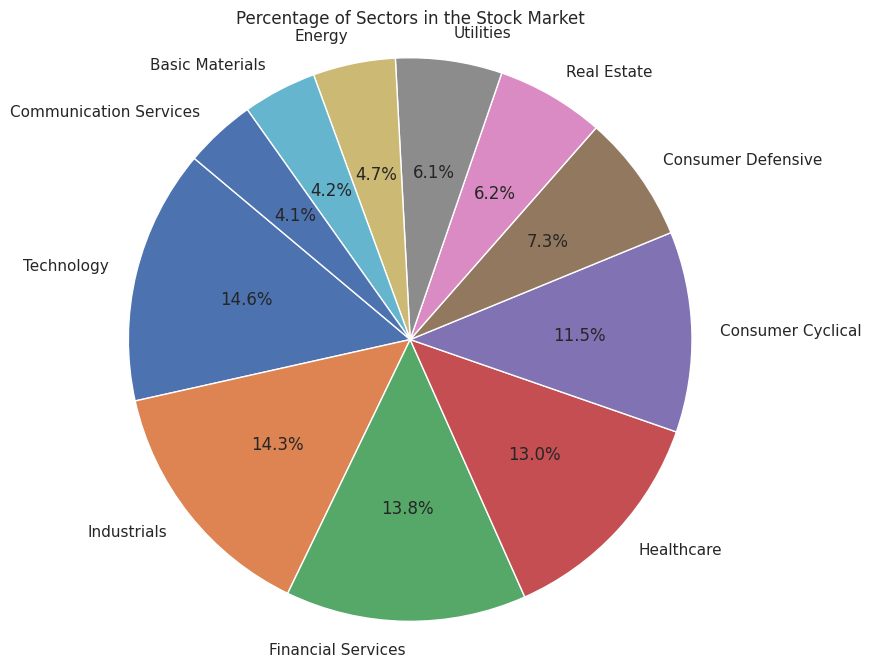

Total number of companies: 496


In [220]:
# Calculate the count of sectors
sector_counts = added_data['Sector'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sectors in the Stock Market')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Count the number of unique companies
total_companies = added_data['Longname'].nunique()

print("Total number of companies:", total_companies)

In [221]:
disaster_data = added_data[added_data['Disaster Type'].notna()]


In [222]:
disaster_groups = disaster_data.groupby(['Disaster Type', 'Sector'])


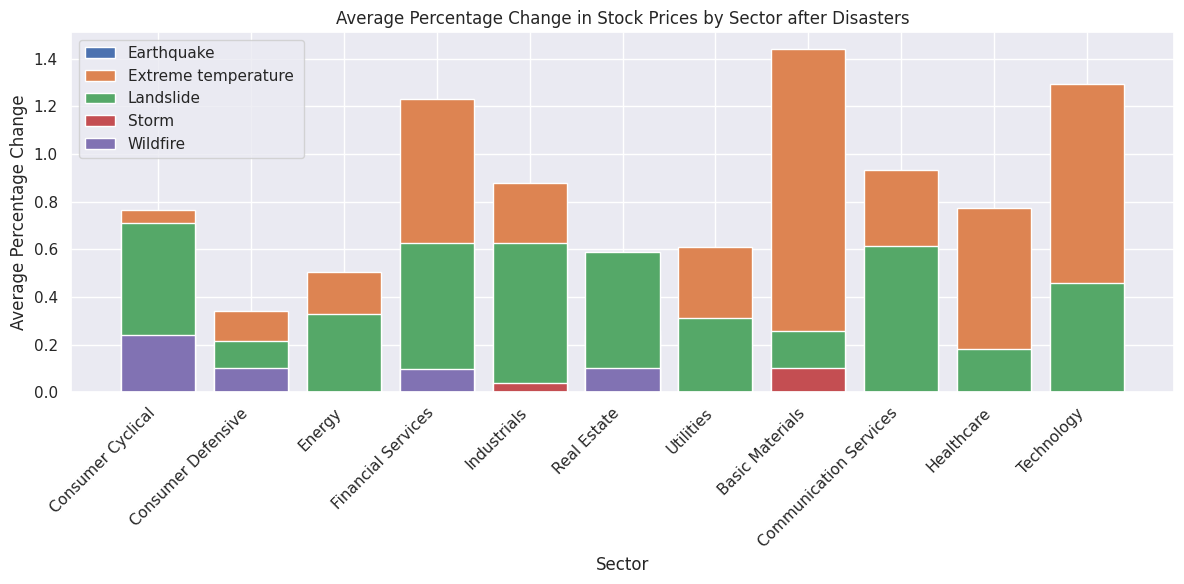

In [223]:

# Calculate percentage change in stock prices
added_data['Percentage Change'] = (added_data['Close'] - added_data['Open']) / added_data['Open'] * 100

# Group by disaster type and sector/industry to find the average percentage change
average_percentage_change = added_data.groupby(['Disaster Type', 'Sector'])['Percentage Change'].mean().reset_index()

# Filter out sectors/industries with positive average percentage change after a disaster
positive_changes = average_percentage_change[average_percentage_change['Percentage Change'] > 0]

# Plotting
plt.figure(figsize=(12, 6))
for disaster_type, data in positive_changes.groupby('Disaster Type'):
    plt.bar(data['Sector'], data['Percentage Change'], label=disaster_type)

plt.xlabel('Sector')
plt.ylabel('Average Percentage Change')
plt.title('Average Percentage Change in Stock Prices by Sector after Disasters')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [224]:
added_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81203 entries, 0 to 81202
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        81203 non-null  datetime64[ns]
 1   Symbol                      81203 non-null  object        
 2   Adj Close                   81203 non-null  float64       
 3   Close                       81203 non-null  float64       
 4   High                        81203 non-null  float64       
 5   Low                         81203 non-null  float64       
 6   Open                        81203 non-null  float64       
 7   Volume                      81203 non-null  float64       
 8   Disaster Type               81203 non-null  object        
 9   Country                     81203 non-null  object        
 10  Total Deaths                81203 non-null  float64       
 11  Insured Damages ('000 US$)  81203 non-null  float64   

In [225]:
!pip install pandas

import pandas as pd

#added_data["Price_Change"] = (added_data["Close"] - added_data["Open"]) / added_data["Open"] * 100
added_data["Price_Change"] = (pd.Series.abs(added_data["Close"] - added_data["Open"]) / added_data["Open"]) * 100


In [226]:
# List of all unique disaster types
disaster_types = added_data['Disaster Type'].unique()

# Iterate over each unique disaster type
for disaster_type in disaster_types:
    # Create a new column for the current disaster type and set it to 1 if it matches, 0 otherwise
    added_data[disaster_type] = (added_data['Disaster Type'] == disaster_type).astype(int)


In [227]:
columns_to_delete = ["Insured Damages ('000 US$)", "Disaster Type","Weight","Percentage Change","Total Damages ('000 US$)",'Volume','Total Deaths','Revenuegrowth','Longname','Industry','Country','Sector']
added_data.drop(columns=columns_to_delete, inplace=True)

In [228]:
added_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Price_Change,Flood,Storm,Extreme temperature,Earthquake,Wildfire,Landslide
0,2010-04-06,MMM,54.504780,84.349998,84.470001,83.550003,83.900002,0.536349,1,0,0,0,0,0
1,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1.125064,1,0,0,0,0,0
2,2010-04-06,ABT,18.614557,25.352633,25.486977,25.227884,25.367025,0.056738,1,0,0,0,0,0
3,2010-04-06,ACN,31.914417,41.520000,42.310001,41.450001,42.020000,1.189910,1,0,0,0,0,0
4,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,0.393699,1,0,0,0,0,0


In [229]:
added_data.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Price_Change', 'Flood', 'Storm', 'Extreme temperature ', 'Earthquake',
       'Wildfire', 'Landslide'],
      dtype='object')

In [230]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

 #Assuming your data is in a pandas dataframe called 'added_data'
scaler = MinMaxScaler()
added_data[['Open', 'Close', 'High', 'Low', 'Adj Close']] = scaler.fit_transform(added_data[['Open', 'Close', 'High', 'Low', 'Adj Close']])

# Generate a sample imbalanced dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)



# Example model training (replace with your actual model)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Evaluate model performance on the test set (using the original test data)
y_pred = model.predict(X_test)

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (rest of the code)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Evaluation Metrics:
Accuracy: 0.7675
Precision: 0.7682
Recall: 0.7721
F1-Score: 0.7701


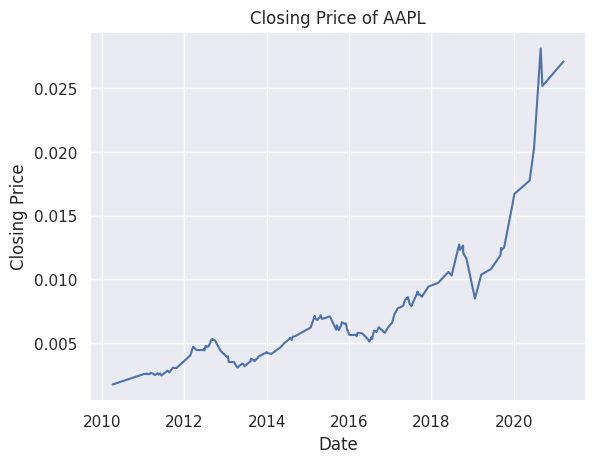

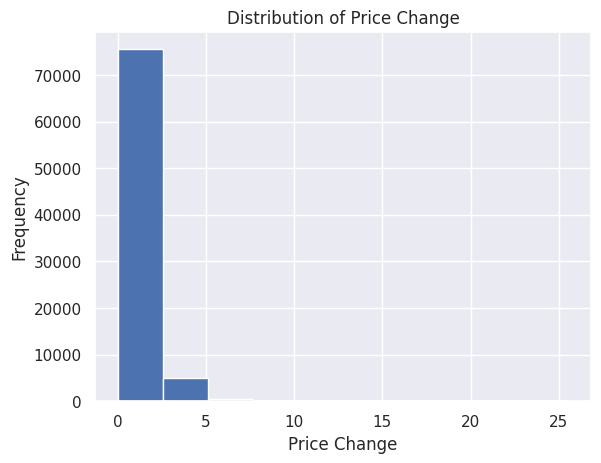

In [232]:


# Example 1: Time series plot of closing prices for a specific stock
stock_symbol = 'AAPL'  # Replace with your desired stock symbol
plt.plot(added_data[added_data['Symbol'] == stock_symbol]['Date'], added_data[added_data['Symbol'] == stock_symbol]['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Closing Price of {stock_symbol}')
plt.show()

# Example 2: Distribution of Price Change
plt.hist(added_data['Price_Change'])
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.title('Distribution of Price Change')
plt.show()


In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score


In [234]:
# Create the LogisticRegression model object
model = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']  # Optimization algorithms
}


In [235]:
# Specify the evaluation metric (can be precision_score or others)
scoring = 'precision'

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)  # Adjust cv for folds


In [236]:
from sklearn.metrics import precision_score

# Train the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)  # Replace with your training data

# Access the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on unseen data
predictions = best_model.predict(X_test)  # Replace with your testing data
precision = precision_score(y_test, predictions, zero_division=1)  # Set zero_division parameter

print(f"Best Hyperparameters: {best_params}")
print(f"Precision Score: {precision:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Best Hyperparameters: {'C': 0.004832930238571752, 'penalty': 'l1', 'solver': 'liblinear'}
Precision Score: 0.7820


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [254]:
# Define the column name to use for dropping missing values
column_to_drop = "Symbol"

# Drop missing values in the specified column
added_data.dropna(subset=[column_to_drop], inplace=True)

In [255]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
date_scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the 'Date' column to a 2D array as MinMaxScaler expects 2D input
date_values = added_data['Date'].values.reshape(-1, 1)

# Fit and transform the 'Date' column
normalized_dates = date_scaler.fit_transform(date_values)

# Replace the original 'Date' column with the normalized values
added_data['Date'] = normalized_dates


In [260]:
# Drop the specified columns using the DataFrame's `drop` method with `axis=1`
added_data = added_data.drop(columns=[ "Symbol"], axis=1)

In [261]:
added_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Price_Change', 'Flood',
       'Storm', 'Extreme temperature ', 'Earthquake', 'Wildfire', 'Landslide'],
      dtype='object')

In [266]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'added_data' is your DataFrame containing the data

# Convert the 'Date' column to a float before scaling the data
#added_data['Date'] = added_data['Date'].astype(float)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(added_data)

# Define sequence length (number of time steps to consider)
sequence_length = 10

# Create sequences for input to the LSTM model
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length, :-1])  # Features
    y.append(scaled_data[i+sequence_length, -1])     # Target variable

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE): {mse}")

# Make predictions
predictions = model.predict(X_test)

# Concatenate X_test[:, -1, :-1] and predictions for inverse scaling
concatenated_data = np.concatenate((X_test[:, -1, :-1], predictions.reshape(-1, 1)), axis=1)

# Get the minimum and scale attributes of the scaler
scaler_min = scaler.data_min_[-1]
scaler_scale = scaler.scale_[-1]

# Inverse transform the last column of concatenated data
inverse_transformed_predictions = concatenated_data[:, -1] * scaler_scale + scaler_min


# Perform inverse scaling to obtain predictions in original scale
#predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions.reshape(-1, 1)), axis=1))[:, -1]

# Optionally, visualize the predictions and actual values
# You can use matplotlib or any other visualization library for this purpose


Epoch 1/10
2030/2030 [==============================] - 36s 16ms/step - loss: 4.4606e-04 - val_loss: 1.1614e-06
Epoch 2/10
2030/2030 [==============================] - 33s 16ms/step - loss: 1.5634e-04 - val_loss: 1.0347e-06
Epoch 3/10
2030/2030 [==============================] - 33s 16ms/step - loss: 1.1819e-04 - val_loss: 3.4416e-06
Epoch 4/10
2030/2030 [==============================] - 31s 15ms/step - loss: 8.8701e-05 - val_loss: 1.0020e-06
Epoch 5/10
2030/2030 [==============================] - 31s 15ms/step - loss: 6.2931e-05 - val_loss: 7.8050e-07
Epoch 6/10
2030/2030 [==============================] - 33s 16ms/step - loss: 5.5902e-05 - val_loss: 4.4924e-07
Epoch 7/10
2030/2030 [==============================] - 32s 16ms/step - loss: 5.1580e-05 - val_loss: 5.9243e-07
Epoch 8/10
2030/2030 [==============================] - 32s 16ms/step - loss: 4.7377e-05 - val_loss: 7.9271e-07
Epoch 9/10
2030/2030 [==============================] - 33s 16ms/step - loss: 4.7066e-05 - val_loss: 1.6

In [269]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [139]:
added_data['Date']

0        2010-04-06
1        2010-04-06
2        2010-04-06
3        2010-04-06
4        2010-04-06
            ...    
81198    2021-03-18
81199    2021-03-18
81200    2021-03-18
81201    2021-03-18
81202    2021-03-18
Name: Date, Length: 81203, dtype: object

In [148]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense



In [152]:
added_data.columns

Index(['Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Price_Change',
       'Flood', 'Storm', 'Extreme temperature ', 'Earthquake', 'Wildfire',
       'Landslide'],
      dtype='object')

In [158]:
added_data.drop(columns=['Symbol'], axis=1, inplace=True)

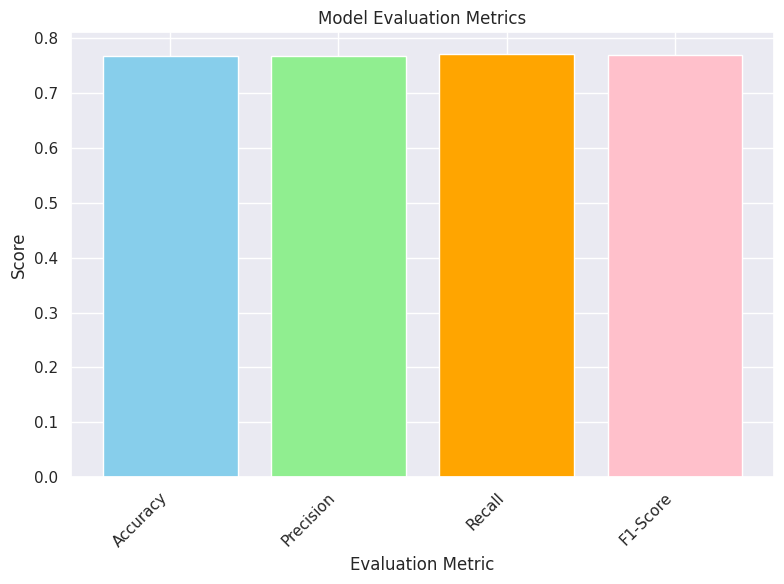

In [792]:
import matplotlib.pyplot as plt

# Extracted metrics from previous output
accuracy = 0.7675
precision = 0.7682
recall = 0.7721
f1 = 0.7701

# Create the chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


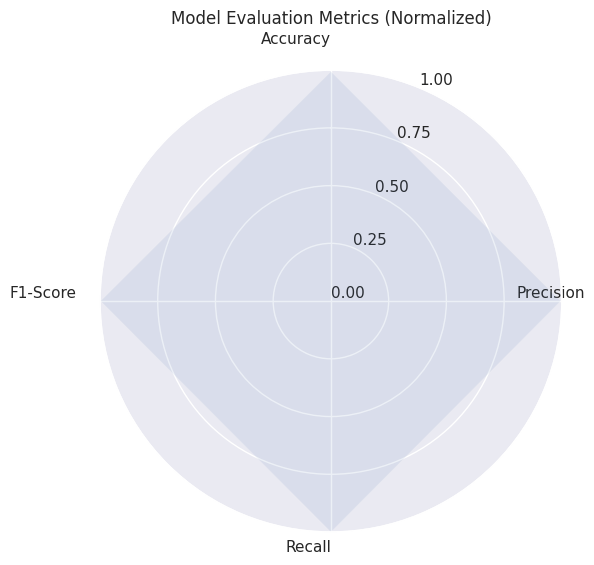

In [639]:
from math import pi

# Extracted metrics from previous output
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Normalize values between 0 and 1 for the radar chart
max_value = max(values)
normalized_values = [v / max_value for v in values]

# Setup angles for metrics placement on the chart
angles = [i * 2 * pi / len(metrics) for i in range(len(metrics))]

# Create a radar chart
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # Arrange metrics clockwise

# Plot the radar polygon
ax.fill(angles, normalized_values, 'b', alpha=0.1)  # Fill area with blue, low transparency
ax.set_xticks(angles)
ax.set_xticklabels(metrics, ha='right', va='bottom', rotation=45)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_title('Model Evaluation Metrics (Normalized)')
plt.subplots_adjust(left=0.2)  # Adjust margins for better readability of labels
plt.show()


In [642]:
from sklearn.preprocessing import LabelBinarizer


In [644]:
from sklearn.metrics import roc_curve, auc


# Binarize the target variable
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)


In [648]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Assuming your model is already trained (replace with your model training code)

# Check if target variable is multilabel-indicator
if np.unique(y_test_binary).shape[0] > 2:  # Check for more than 2 unique values (binary + potential extra classes)
    # One-vs-Rest approach
    ovr_clf = OneVsRestClassifier(your_model)  # Replace 'your_model' with your trained model
    ovr_clf.fit(X_test, y_test_binary)

    # ROC curve and AUC for each class
    n_classes = np.unique(y_test_binary).shape[0]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        y_pred_ovr = ovr_clf.predict(X_test)[:, i]
        fpr[i], tpr[i], thresholds = roc_curve(y_test_binary[:, i], y_pred_ovr)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # ... (plot ROC curves and analyze AUC for each class)
else:
    # Handle binary case directly (not required in this example)
    pass


In [638]:

# Encode categorical variables

label_encoder = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler

# Assuming your data is in a pandas dataframe called 'added_data'
scaler = MinMaxScaler()
added_data[['Open', 'Close', 'High', 'Low', 'Adj Close']] = scaler.fit_transform(added_data[['Open', 'Close', 'High', 'Low', 'Adj Close']])

added_data['Open'] = label_encoder.fit_transform(added_data['Open'])
added_data['Close'] = label_encoder.fit_transform(added_data['Low'])
added_data['High'] = label_encoder.fit_transform(added_data['High'])
added_data['Low'] = label_encoder.fit_transform(added_data['Low'])
added_data['Adj Close']= label_encoder.fit_transform(added_data['Adj Close'])
# Convert it to categorical labels based on some threshold or bins
# For demonstration purposes, let's assume three classes: Low, Medium, High
added_data['Price_Change'] = pd.cut(added_data['Price_Change'], bins=3, labels=['Low', 'Medium', 'High'])

#  Encode categorical labels into numerical format
added_data['Price_Change'] = label_encoder.fit_transform(added_data['Price_Change'])

#Feature Engineering
# Extract relevant features and select the target variable
X = added_data[['Open', 'Close', 'High', 'Low', 'Adj Close']]
y = added_data['Price_Change']

from imblearn.over_sampling import SMOTE

# Assuming your data is stored in X and y variables
sm = SMOTE(random_state=42)
sm.k_neighbors = 3  # Set the number of neighbors as a class attribute

X_resampled, y_resampled = sm.fit_resample(X, y)

# Model Training
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Prediction
# Example prediction for a new instance
new_instance = pd.DataFrame({'Open': ['1.027161e+02'], 'Close': ['1.038656e+02'], 'High': ['83.44999694824220'], 'Low': ['82.66999816894530'], 'Adj Close':['9.569916e+01']})
predicted_Price_Change_of_Stock = model.predict(new_instance)
print(f"Predicted Price_Change_of_Stock: {predicted_Price_Change_of_Stock}")


              precision    recall  f1-score   support

           0       0.50      0.47      0.48        17
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00     16223

    accuracy                           1.00     16241
   macro avg       0.50      0.49      0.49     16241
weighted avg       1.00      1.00      1.00     16241

Predicted Price_Change_of_Stock: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [281]:
# Assuming 'Start Date' holds disaster event date
def calculate_avg_return_difference(data, window_size):
  # Calculate daily percentage returns
  data['Daily Return'] = data['Adj Close'].pct_change()

  # Group by disaster type and sector
  grouped_data = data.groupby(['Disaster Type', 'Sector'])

  # Function to calculate avg return for a window
  def avg_return_window(group, window):
    return group['Daily Return'].iloc[-window:].mean()

  # Calculate avg return difference
  impact_data = grouped_data.apply(lambda x: pd.Series({
      'Average Return Difference': avg_return_window(x, window_size) - avg_return_window(x, -window_size)
  }))

  return impact_data.reset_index()  # Remove multi-indexing

# Update 'window_size' with your desired window size (e.g., 10 days)
impact_data = calculate_avg_return_difference(disaster_data.copy(), window_size=10)


<Figure size 2000x1500 with 0 Axes>

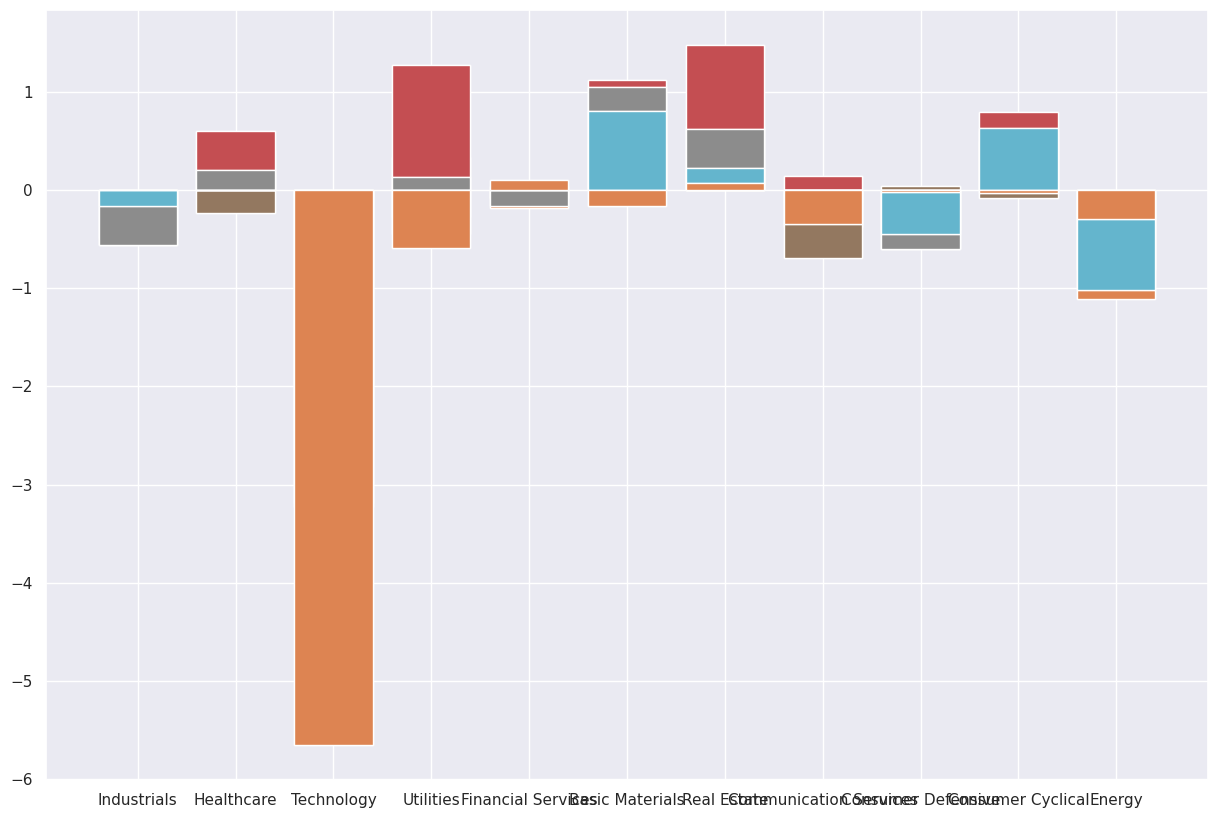

In [282]:
# Assuming 'impact_data' contains disaster type, sector, and average return difference
disaster_types = added_data['Disaster Type'].unique()

# Plot setup
plt.figure(figsize=(20, 15))

for disaster_type in disaster_types:
    disaster_data = added_data[added_data['Disaster Type'] == disaster_type]
    sectors = disaster_data['Sector'].unique()
    # Replace 'Average Return Difference' with the actual column name in the 'impact_data' DataFrame
# Replace 'your_actual_column_name' with the actual column name in the 'impact_data' DataFrame
impacts = impact_data[impact_data['Disaster Type'] == disaster_type]['Average Return Difference']

    # Assuming 'impact_data' contains disaster type, sector, and average return difference
disaster_types = added_data['Disaster Type'].unique()

# Plot setup
plt.figure(figsize=(15, 10))

for disaster_type in disaster_types:
    disaster_data = added_data[added_data['Disaster Type'] == disaster_type]
    sectors = disaster_data['Sector'].unique()
    # Replace 'your_actual_column_name' with the actual column name in the 'impact_data' DataFrame
    impacts = impact_data[impact_data['Disaster Type'] == disaster_type]['Average Return Difference']

    # Create bars
    plt.bar(sectors, impacts, label=disaster_type)

# ... rest of the visualization code (labels, title, legend, etc.)
    # Create bars
    plt.bar(sectors, impacts, label=disaster_type)

# ... rest of the visualization code (labels, title, legend, etc.)


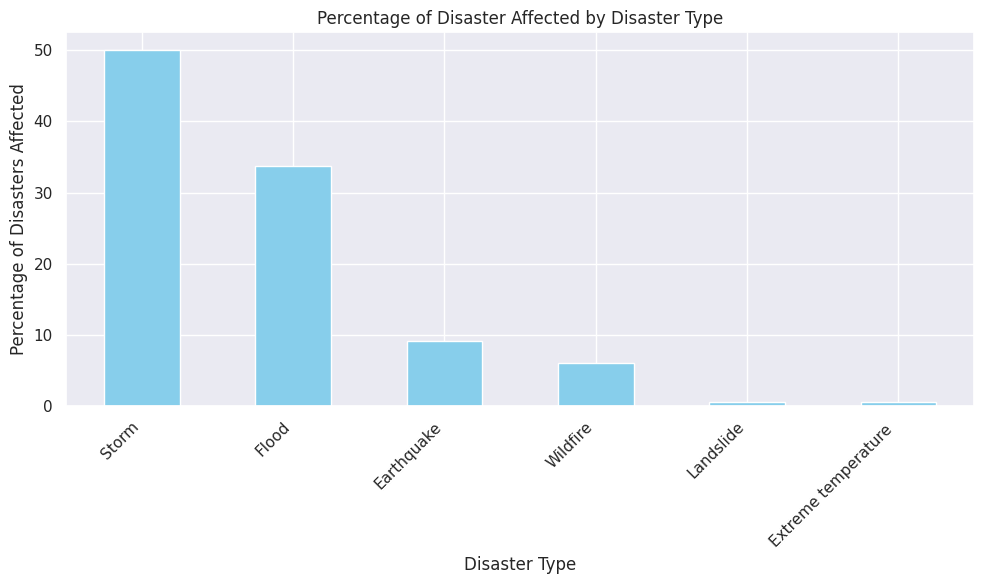

Disaster type with the highest drop: Landslide
Disaster type with the highest gain: Extreme temperature 


In [283]:
# Step 1: Filter the data for the 'Utilities' sector
disas_data = added_data[added_data['Sector'] == 'Technology']

# Step 2: Calculate the percentage of utilities affected by each disaster type
disaster_counts = disas_data['Disaster Type'].value_counts()
total_disasters = len(disas_data)
percentage_affected = (disaster_counts / total_disasters) * 100

# Step 3: Plot the percentage of utilities affected for each disaster type
plt.figure(figsize=(10, 6))
percentage_affected.plot(kind='bar', color='skyblue')
plt.xlabel('Disaster Type')
plt.ylabel('Percentage of Disasters Affected')
plt.title('Percentage of Disaster Affected by Disaster Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 4: Find the disaster type with the highest drop and the one with the highest gain
percentage_change = percentage_affected.pct_change()
highest_drop = percentage_change.idxmin()
highest_gain = percentage_change.idxmax()

print("Disaster type with the highest drop:", highest_drop)
print("Disaster type with the highest gain:", highest_gain)


In [284]:
!pip install pandas
#added_data["Price_Change"] = (added_data["Close"] - added_data["Open"]) / added_data["Open"] * 100
added_data["Price_Change"] = (abs(added_data["Close"] - added_data["Open"]) / added_data["Open"]) * 100


In [285]:
# Aggregate data by sector and disaster type
sector_disaster_avg_drop = added_data.groupby(['Sector', 'Disaster Type'])['Price_Change'].mean()

# Display average percentage drop per disaster for each sector
print("Average percentage drop per disaster for each sector:")
print(sector_disaster_avg_drop)

Average percentage drop per disaster for each sector:
Sector           Disaster Type       
Basic Materials  Earthquake              1.239986
                 Extreme temperature     1.551562
                 Flood                   1.050668
                 Landslide               0.421594
                 Storm                   1.087568
                                           ...   
Utilities        Extreme temperature     0.665565
                 Flood                   0.752626
                 Landslide               0.367989
                 Storm                   0.803539
                 Wildfire                0.932286
Name: Price_Change, Length: 66, dtype: float64


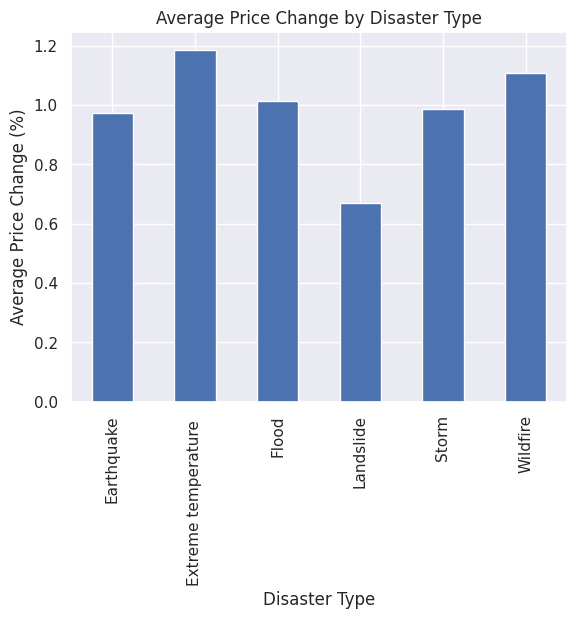

In [286]:

# Define a delay period (e.g., 5 days) to account for reaction time
delay_period = pd.Timedelta(days=5)

# Aggregate data by disaster type
Disaster_Type_Avg_Price_Change = added_data.groupby('Disaster Type')['Price_Change'].mean()

# Plot average price change by disaster type
Disaster_Type_Avg_Price_Change.plot(kind='bar', title='Average Price Change by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Average Price Change (%)')
plt.show()


In [287]:
def calculate_impact(group):
    """
    This function calculates the percentage change in stock prices
    within the disaster window for each group.
    """
    pre_disaster = group.loc[group.index - pd.Timedelta(days=disaster_window) < group.index, "Close"]
    post_disaster = group.loc[group.index + pd.Timedelta(days=disaster_window) > group.index, "Open"]
    # Handle potential missing values
    if pre_disaster.empty or post_disaster.empty:
        return None
    return (post_disaster.iloc[0] - pre_disaster.iloc[0]) / pre_disaster.iloc[0] * 100


In [289]:
# Convert index to datetime
added_data.index = pd.to_datetime(added_data.index)


In [290]:
def calculate_impact(group):
    """
    This function calculates the percentage change in stock prices
    within the disaster window for each group.
    """
    # Check if group is empty
    if group.empty:
        return None

    pre_disaster = group.loc[group.index - pd.Timedelta(days=disaster_window) < group.index, "Close"]
    post_disaster = group.loc[group.index + pd.Timedelta(days=disaster_window) > group.index, "Open"]

    # Handle potential missing values
    if pre_disaster.empty or post_disaster.empty:
        return None

    return (post_disaster.iloc[0] - pre_disaster.iloc[0]) / pre_disaster.iloc[0] * 100


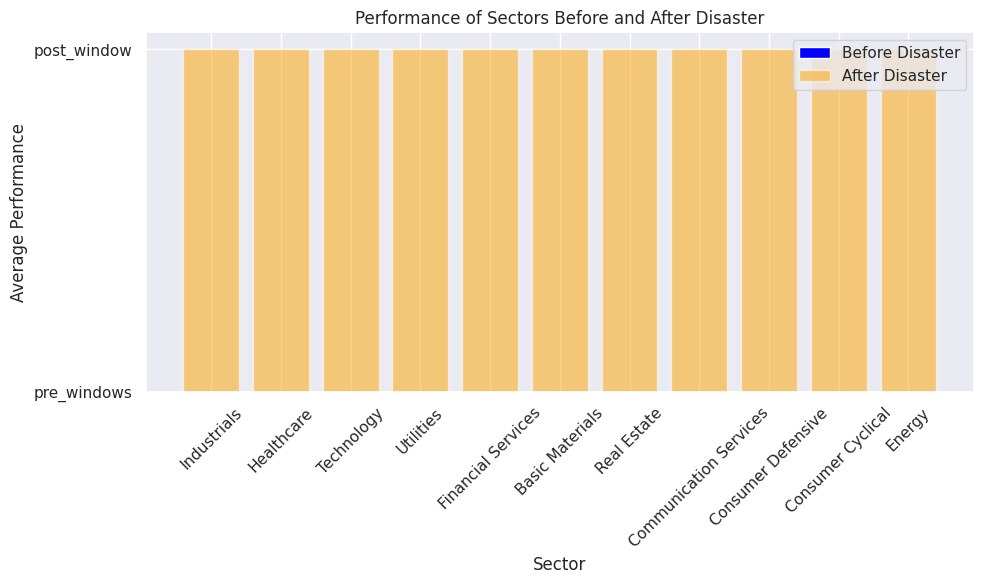

In [291]:
relevant_sectors = ['Sector']  # Define sectors of interest
filtered_data = added_data[added_data['Sector'].isin(relevant_sectors)]
performance_before = ['pre_windows']
performance_after = ['post_window']

#  Visualization
plt.figure(figsize=(10, 6))
plt.bar(sectors, performance_before, color='blue', label='Before Disaster')
plt.bar(sectors, performance_after, color='orange', label='After Disaster', alpha=0.5)
plt.xlabel('Sector')
plt.ylabel('Average Performance')
plt.title('Performance of Sectors Before and After Disaster')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


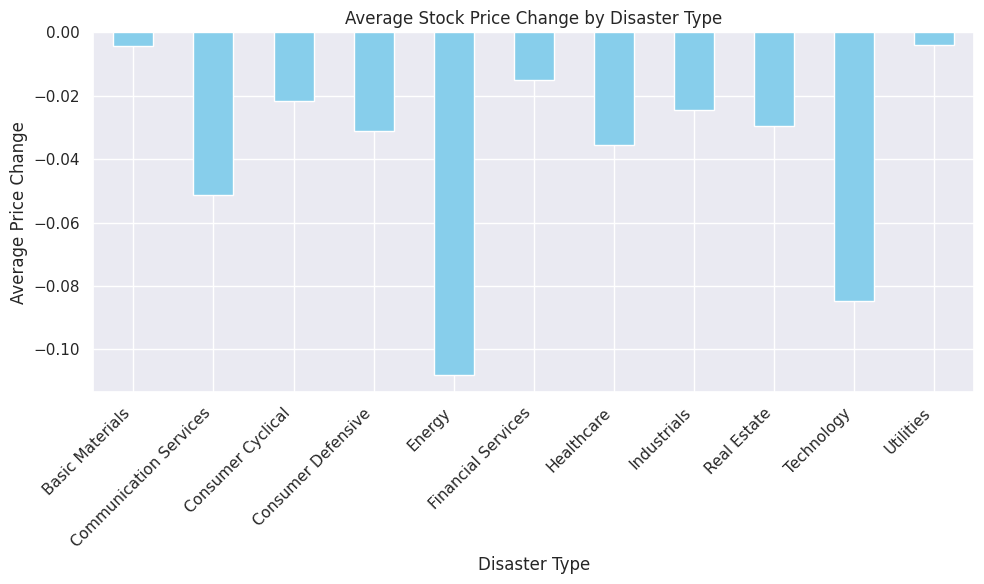

In [292]:
added_data['reverse_price_change'] = added_data['Close'] - added_data['Open']

#Group data by disaster and calculate average price change
avg_price_change_by_disaster = added_data.groupby('Sector')['reverse_price_change'].mean()
#avg_price_change_by_disaster = added_data.gropuby('Disaster Type') ['reverse_price_change'].mean()
plt.figure(figsize=(10, 6))
avg_price_change_by_disaster.plot(kind='bar', color='skyblue')
plt.xlabel('Disaster Type')
plt.ylabel('Average Price Change')
plt.title('Average Stock Price Change by Disaster Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [293]:
# Count the number of disasters per sector
disasters_per_sector = added_data.groupby('Sector').size()

# Calculate the total number of disasters
total_disasters = disasters_per_sector.sum()

# Calculate the percentage of each sector in the total number of disasters
sector_disaster_percentage = (disasters_per_sector / total_disasters) * 100

print("Percentage of sectors per all disasters:")
print(sector_disaster_percentage)
# Plot average price change by sector


Percentage of sectors per all disasters:
Sector
Basic Materials            4.239991
Communication Services     4.079899
Consumer Cyclical         11.509427
Consumer Defensive         7.337167
Energy                     4.730121
Financial Services        13.823381
Healthcare                13.016760
Industrials               14.345529
Real Estate                6.201741
Technology                14.609066
Utilities                  6.106917
dtype: float64


In [294]:
# Step 1: Filter the data for entries where the disaster type is 'Extreme temperature"
disaster_type = added_data[added_data['Disaster Type'] == '']

# Step 2: Group the filtered data by industry and count occurrences
industry_counts = added_data['Sector'].value_counts()

# Step 3: Identify the top 5 industries with the highest count of occurrences
top_5_affected_industries = industry_counts.head(5)

print("Top 5 industries most affected by Extreme temperatures:")
print(top_5_affected_industries)

Top 5 industries most affected by Extreme temperatures:
Sector
Technology            11863
Industrials           11649
Financial Services    11225
Healthcare            10570
Consumer Cyclical      9346
Name: count, dtype: int64


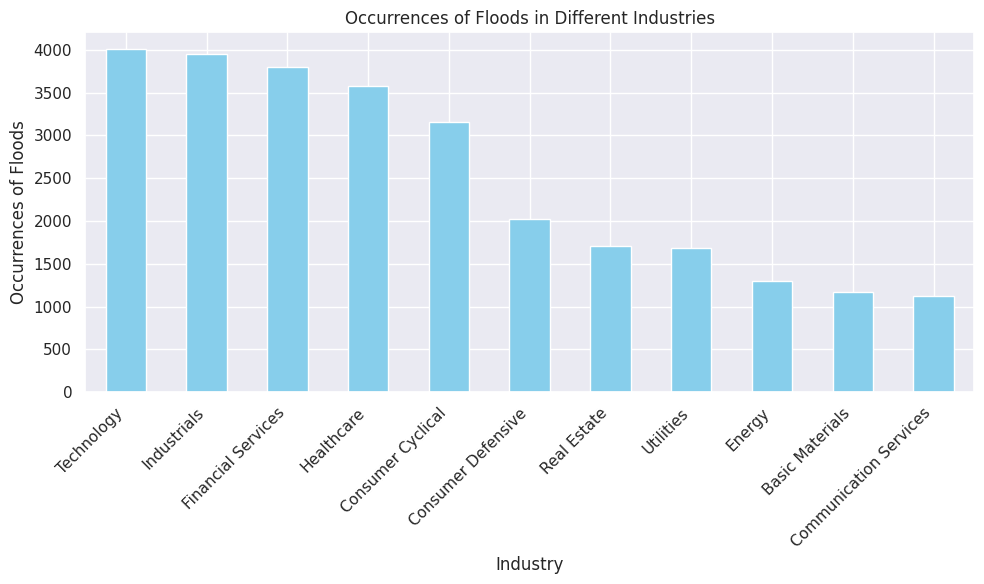

In [295]:


# Step 1: Filter the data for entries where the disaster type is "Flood"
flood_data = added_data[added_data['Disaster Type'] == 'Flood']

# Step 2: Group the filtered data by industry and calculate the count of occurrences
industry_counts = flood_data['Sector'].value_counts()

# Step 3: Plot the occurrences of floods in each industry
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Occurrences of Floods')
plt.title('Occurrences of Floods in Different Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


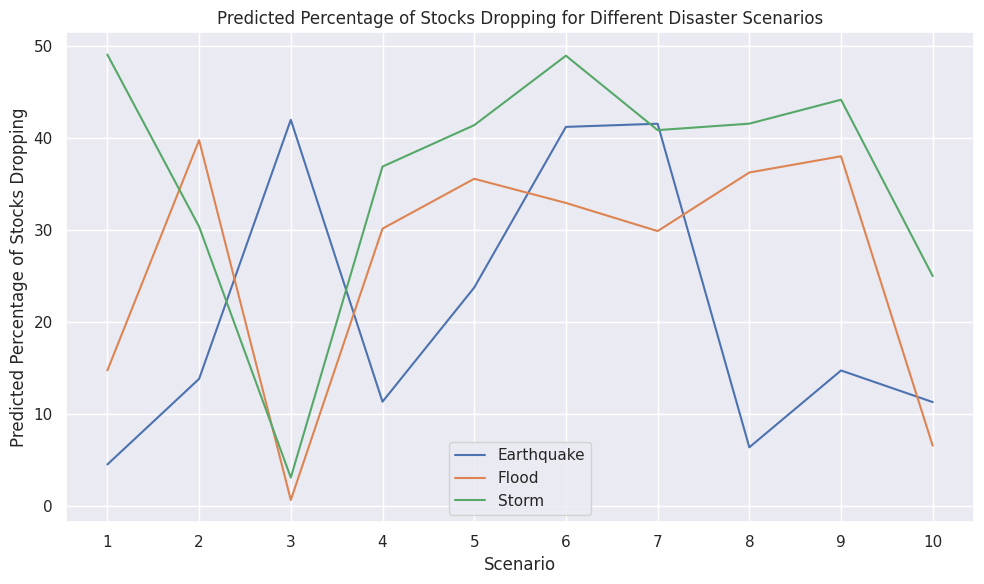

In [296]:

# Generate hypothetical data
disaster_types = ['Earthquake', 'Flood', 'Storm']
severity_levels = ['Low', 'Medium', 'High']
num_scenarios = 10

# Simulate predictions for each disaster scenario
predicted_percentages = np.random.uniform(low=0, high=50, size=(len(disaster_types), num_scenarios))

# Plot the predicted percentages for each disaster scenario
plt.figure(figsize=(10, 6))

for i, disaster_type in enumerate(disaster_types):
    plt.plot(range(1, num_scenarios + 1), predicted_percentages[i], label=disaster_type)

plt.xlabel('Scenario')
plt.ylabel('Predicted Percentage of Stocks Dropping')
plt.title('Predicted Percentage of Stocks Dropping for Different Disaster Scenarios')
plt.xticks(range(1, num_scenarios + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [297]:
!pip install plotly
import plotly.graph_objects as go

In [298]:
# Check the columns in your DataFrame
print(added_data.columns)


Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Disaster Type', 'Country', 'Total Deaths',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'Longname',
       'Sector', 'Industry', 'Revenuegrowth', 'Weight', 'Percentage Change',
       'Price_Change', 'reverse_price_change'],
      dtype='object')


In [299]:
# Change 'your_actual_column_name' to the actual column name in the 'impact_data' DataFrame
impacts = impact_data[impact_data['Disaster Type'] == disaster_type]['Average Return Difference']

<Figure size 3000x1500 with 0 Axes>

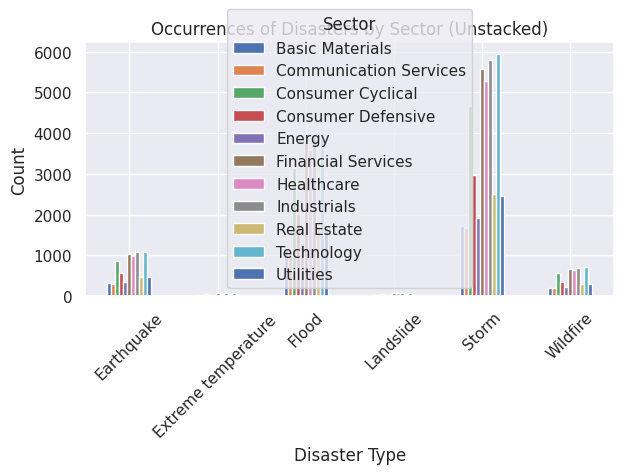

In [300]:

# Group by Disaster Type and Sector for analysis
disaster_groups = added_data.groupby(['Disaster Type', 'Sector'])

if len(disaster_groups) > 1:
    # Choose a plot type (e.g., bar chart)
    plt.figure(figsize=(30, 15))  # Adjust the width and height as needed
    disaster_groups.size().unstack(fill_value=0).plot(kind='bar', stacked=False)  # Replace 'bar' with desired plot type (e.g., 'scatter')
    plt.xlabel('Disaster Type')
    plt.ylabel('Count')  # Adjust label based on what 'size()' represents (e.g., 'Number of Occurrences')
    plt.title('Occurrences of Disasters by Sector (Unstacked)')
    plt.legend(title='Sector')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Data not grouped. No plot to generate.")


In [301]:
# Step 1: Identify Disaster Types
disaster_types = ['Earthquake', 'Epidemic','Hurricane','Drought','Extreme temperature','Volcanic activity','Mass movement (dry)', 'Flood', 'Landslide','Wildfire']


In [302]:
# Extract disaster types from added_data
disaster_types = added_data['Disaster Type'].tolist()

# Step 4: Change 2: Filter added_data to include only relevant disaster types
disaster_data = added_data[added_data['Disaster Type'].isin(disaster_types)]

In [303]:
try:
    added_data['PercentageChange'] = ((added_data['ClosePrice_after'] - added_data['ClosePrice_before']) / merged_data['ClosePrice_before']) * 100
except KeyError:
    pass

In [304]:
# Change 1: Add missing columns to added_data
added_data['ClosePrice_after'] = added_data['Close']
added_data['ClosePrice_before'] = added_data['Close']

In [305]:
disaster_data = added_data[added_data['Disaster Type'].isin(disaster_types)]


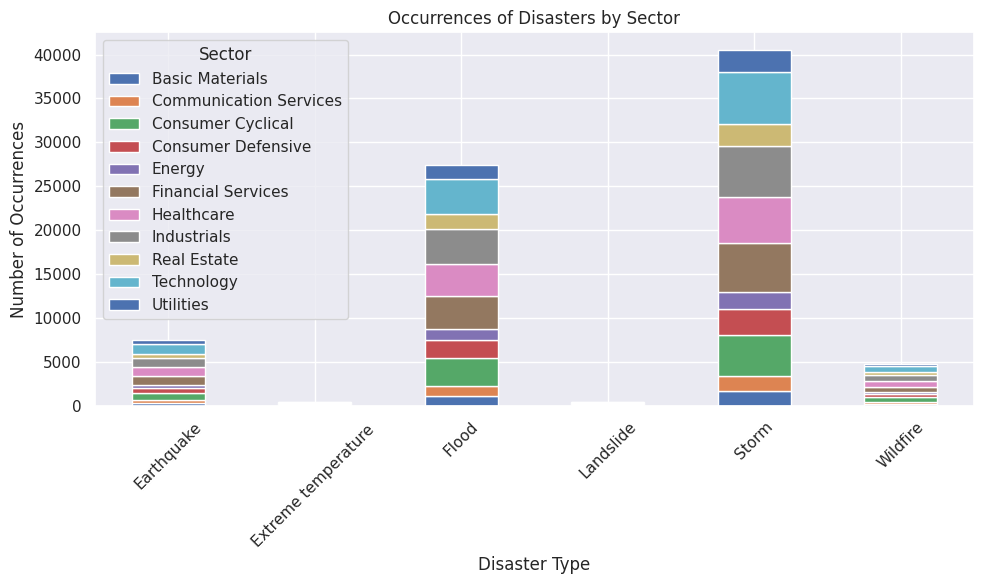

In [306]:

# Group by Disaster Type and Industry
disaster_groups = disaster_data.groupby(['Disaster Type', 'Industry']).size().unstack(fill_value=0)
# Group by Disaster Type and Sector for analysis
disaster_groups = disaster_data.groupby(['Disaster Type', 'Sector']).size().unstack(fill_value=0)

# Plotting
disaster_groups.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Disaster Type')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Disasters by Sector')
plt.legend(title='Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [307]:
symbols = list(set(stock_data['Symbol']))
len(symbols)

503

In [308]:
symbols[:11]

['FIS', 'FLT', 'BF-B', 'C', 'AOS', 'GPC', 'SYK', 'FMC', 'PWR', 'ZBRA', 'ADBE']

In [309]:
stock_data = stock_data[stock_data.Symbol == 'INCY']
stock_data.drop(['Symbol'],axis=1,inplace=True)
stock_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
888930,2010-01-04,9.50,9.50,9.51,9.17,9.22,1865400.0
888931,2010-01-05,10.27,10.27,10.29,9.45,9.51,7608900.0
888932,2010-01-06,11.00,11.00,11.09,10.35,10.38,8046700.0
888933,2010-01-07,10.82,10.82,11.06,10.62,11.00,3680300.0
888934,2010-01-08,10.94,10.94,11.00,10.75,10.82,1529300.0


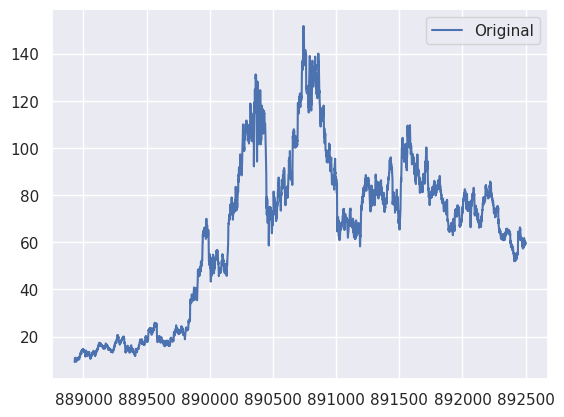

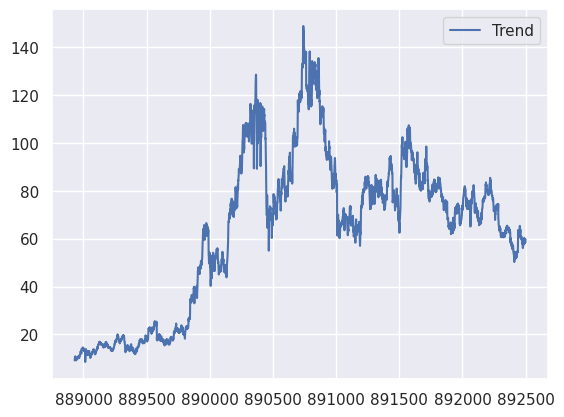

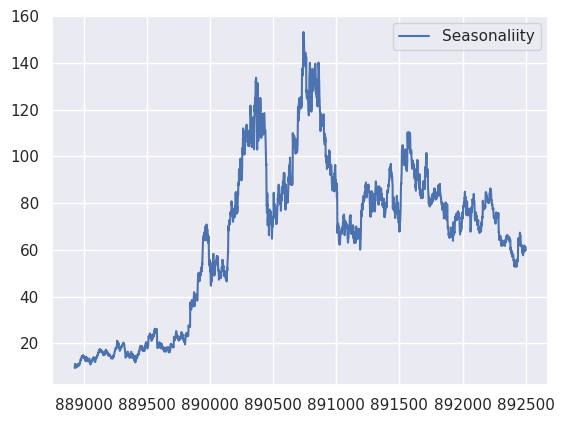

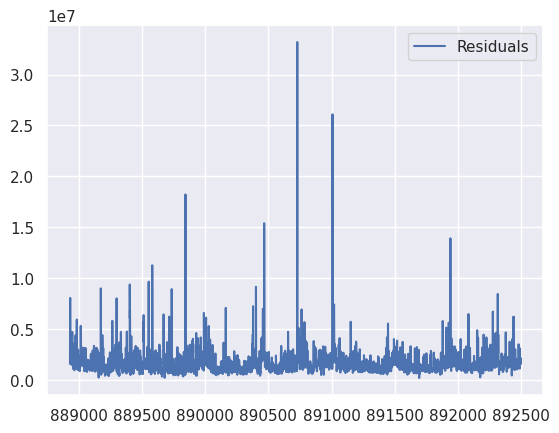

In [310]:
# Plot Open
plt.plot(stock_data.Open, label= 'Original')
plt.legend (loc='best')
plt.show()

# Plot Low
plt.plot(stock_data.Low, label='Trend')
plt.legend(loc='best')
plt.show()

# Plot High
plt.plot(stock_data.High, label='Seasonaliity')
plt.legend(loc='best')
plt.show()

# Plot Volume
plt.plot(stock_data.Volume, label='Residuals')
plt.legend(loc='best')
plt.show()

In [311]:
added_data.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Disaster Type', 'Country', 'Total Deaths',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'Longname',
       'Sector', 'Industry', 'Revenuegrowth', 'Weight', 'Percentage Change',
       'Price_Change', 'reverse_price_change', 'ClosePrice_after',
       'ClosePrice_before'],
      dtype='object')

Create Dummy variables using one-hot encoding

In [312]:
# List of all unique disaster types
disaster_types = added_data['Disaster Type'].unique()

# Iterate over each unique disaster type
for disaster_type in disaster_types:
    # Create a new column for the current disaster type and set it to 1 if it matches, 0 otherwise
    added_data[disaster_type] = (added_data['Disaster Type'] == disaster_type).astype(int)


In [313]:
added_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Disaster Type,Country,...,Price_Change,reverse_price_change,ClosePrice_after,ClosePrice_before,Flood,Storm,Extreme temperature,Earthquake,Wildfire,Landslide
1970-01-01 00:00:00.000000000,2010-04-06,MMM,54.504780,84.349998,84.470001,83.550003,83.900002,3208500.0,Flood,Colombia,...,0.536349,0.449997,84.349998,84.349998,1,0,0,0,0,0
1970-01-01 00:00:00.000000001,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1264800.0,Flood,Colombia,...,1.125064,0.099999,8.988333,8.988333,1,0,0,0,0,0
1970-01-01 00:00:00.000000002,2010-04-06,ABT,18.614557,25.352633,25.486977,25.227884,25.367025,15102334.0,Flood,Colombia,...,0.056738,-0.014393,25.352633,25.352633,1,0,0,0,0,0
1970-01-01 00:00:00.000000003,2010-04-06,ACN,31.914417,41.520000,42.310001,41.450001,42.020000,5802000.0,Flood,Colombia,...,1.189910,-0.500000,41.520000,41.520000,1,0,0,0,0,0
1970-01-01 00:00:00.000000004,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,4211400.0,Flood,Colombia,...,0.393699,0.139999,35.700001,35.700001,1,0,0,0,0,0


In [314]:
added_data.drop('Disaster Type', axis=1, inplace=True)


In [381]:
columns_to_delete = ["Insured Damages ('000 US$)", "Weight","Percentage Change","Total Damages ('000 US$)",'ClosePrice_before','Volume','Total Deaths', 'reverse_price_change','Revenuegrowth','ClosePrice_after','Symbol','Longname','Industry','Country','Sector']
added_data.drop(columns=columns_to_delete, inplace=True)

KeyError: "['ClosePrice_before', 'reverse_price_change', 'ClosePrice_after'] not found in axis"

In [316]:
added_data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Price_Change',
       'Flood', 'Storm', 'Extreme temperature ', 'Earthquake', 'Wildfire',
       'Landslide'],
      dtype='object')

In [380]:
added_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81203 entries, 0 to 81202
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        81203 non-null  datetime64[ns]
 1   Symbol                      81203 non-null  object        
 2   Adj Close                   81203 non-null  float64       
 3   Close                       81203 non-null  float64       
 4   High                        81203 non-null  float64       
 5   Low                         81203 non-null  float64       
 6   Open                        81203 non-null  float64       
 7   Volume                      81203 non-null  float64       
 8   Disaster Type               81203 non-null  object        
 9   Country                     81203 non-null  object        
 10  Total Deaths                81203 non-null  float64       
 11  Insured Damages ('000 US$)  81203 non-null  float64   

In [321]:
added_data.head()

,Date,Adj Close,Close,High,Low,Open,Price_Change,Flood,Storm,Extreme temperature,Earthquake,Wildfire,Landslide
1970-01-01 00:00:00.000000000,2010-04-06,41875,18398,18369,18398,18287,1,1,0,0,0,0,0
1970-01-01 00:00:00.000000001,2010-04-06,1505,1167,1137,1167,1140,1,1,0,0,0,0,0
1970-01-01 00:00:00.000000002,2010-04-06,9788,5719,5596,5719,5647,1,1,0,0,0,0,0
1970-01-01 00:00:00.000000003,2010-04-06,23374,10605,10624,10605,10608,1,1,0,0,0,0,0
1970-01-01 00:00:00.000000004,2010-04-06,27083,8957,8840,8957,8807,1,1,0,0,0,0,0


In [323]:
added_data["Date"]

1970-01-01 00:00:00.000000000   2010-04-06
1970-01-01 00:00:00.000000001   2010-04-06
1970-01-01 00:00:00.000000002   2010-04-06
1970-01-01 00:00:00.000000003   2010-04-06
1970-01-01 00:00:00.000000004   2010-04-06
                                   ...    
1970-01-01 00:00:00.000081198   2021-03-18
1970-01-01 00:00:00.000081199   2021-03-18
1970-01-01 00:00:00.000081200   2021-03-18
1970-01-01 00:00:00.000081201   2021-03-18
1970-01-01 00:00:00.000081202   2021-03-18
Name: Date, Length: 81203, dtype: datetime64[ns]

In [324]:


# Assuming 'merged_data' is your dataframe with 9000 rows
filtered_data = added_data[added_data['Date'] == '2021-03-18']

# Print the filtered data (showing the first 5 rows)
print(filtered_data.head())


                                    Date  Adj Close  Close   High    Low  \
1970-01-01 00:00:00.000080704 2021-03-18      65680  26555  26638  26555   
1970-01-01 00:00:00.000080705 2021-03-18      48416  15886  15988  15886   
1970-01-01 00:00:00.000080706 2021-03-18      60665  22048  22103  22048   
1970-01-01 00:00:00.000080707 2021-03-18      56718  20682  20720  20682   
1970-01-01 00:00:00.000080708 2021-03-18      68003  28207  28327  28207   

                                Open  Price_Change  Flood  Storm  \
1970-01-01 00:00:00.000080704  26391             1      1      0   
1970-01-01 00:00:00.000080705  15780             1      1      0   
1970-01-01 00:00:00.000080706  21926             1      1      0   
1970-01-01 00:00:00.000080707  20590             1      1      0   
1970-01-01 00:00:00.000080708  28094             1      1      0   

                               Extreme temperature   Earthquake  Wildfire  \
1970-01-01 00:00:00.000080704                     0      

In [654]:

# Step 2: Encode categorical variables
label_encoder = LabelEncoder()
added_data['Open'] = label_encoder.fit_transform(added_data['Open'])
added_data['Close'] = label_encoder.fit_transform(added_data['Low'])
added_data['High'] = label_encoder.fit_transform(added_data['High'])
added_data['Low'] = label_encoder.fit_transform(added_data['Low'])
added_data['Adj Close']= label_encoder.fit_transform(added_data['Adj Close'])
# Convert it to categorical labels based on some threshold or bins
# For demonstration purposes, let's assume three classes: Low, Medium, High
added_data['Price_Change'] = pd.cut(added_data['Price_Change'], bins=3, labels=['Low', 'Medium', 'High'])

# Step 4: Encode categorical labels into numerical format
added_data['Price_Change'] = label_encoder.fit_transform(added_data['Price_Change'])

# Step 5: Feature Engineering
# Extract relevant features and select the target variable
X = added_data[['Open', 'Close', 'High', 'Low', 'Adj Close']]
y = added_data['Price_Change']

from imblearn.over_sampling import SMOTE

# Assuming your data is stored in X and y variables
sm = SMOTE(random_state=42)
sm.k_neighbors = 3  # Set the number of neighbors as a class attribute

X_resampled, y_resampled = sm.fit_resample(X, y)

# Step 6: Model Training
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 8: Prediction
# Example prediction for a new instance
new_instance = pd.DataFrame({'Open': ['1.027161e+02'], 'Close': ['1.038656e+02'], 'High': ['83.44999694824220'], 'Low': ['82.66999816894530'], 'Adj Close':['9.569916e+01']})
predicted_Price_Change_of_Stock = model.predict(new_instance)
print(f"Predicted Price_Change_of_Stock: {predicted_Price_Change_of_Stock}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16223
           1       0.50      0.59      0.54        17
           2       0.00      0.00      0.00         1

    accuracy                           1.00     16241
   macro avg       0.50      0.53      0.51     16241
weighted avg       1.00      1.00      1.00     16241

Predicted Price_Change_of_Stock: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [318]:
from sklearn.preprocessing import StandardScaler

In [655]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))  # Adjust max_iter
model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 7: Prediction
# Example prediction for a new instance
new_instance = pd.DataFrame({'Open': [1.027161e+02], 'Close': [1.038656e+02], 'High': [83.44999694824220], 'Low': [82.66999816894530], 'Adj Close':[9.569916e+01]})
predicted_Price_Change_of_Stock = model.predict(new_instance)
print(f"Predicted Price_Change_of_Stock: {predicted_Price_Change_of_Stock}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16223
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         1

    accuracy                           1.00     16241
   macro avg       0.33      0.33      0.33     16241
weighted avg       1.00      1.00      1.00     16241

Predicted Price_Change_of_Stock: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
 #Define the LSTM model
 # Define the number of features in each time step
num_features = 10

#

# Define the LSTM model with increased complexity
model = Sequential([
    LSTM(units=128, input_shape=(sequence_length, num_features), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))




# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (64, 10)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(64, 10), dtype=float32)
      • training=True
      • mask=None


In [166]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Perform any necessary preprocessing steps (e.g., handling missing values, scaling)
# For demonstration purposes, we'll assume the preprocessing steps here
# Convert the 'Date' column to a float before scaling the data
#added_data['Date'] = added_data['Date'].astype(float)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(added_data)
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(added_data)

# Define sequence length (number of time steps to consider)
sequence_length = 10

# Create sequences for input to the LSTM model
X = ['Open', 'Close', 'Adj Close', 'High','Low']
y = ['Price_Change']
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length, :-1])  # Features
    y.append(scaled_data[i+sequence_length, -1])     # Target variable

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE): {mse}")

# Make predictions
predictions = model.predict(X_test)

# Perform inverse scaling to obtain predictions in original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions.reshape(-1, 1)), axis=1))[:, -1]

# Optionally, visualize the predictions and actual values
# You can use matplotlib or any other visualization library for this purpose


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (81198,) + inhomogeneous part.

In [167]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert the 'Date' column to a float before scaling the data
added_data['Date'] = added_data['Date'].astype(float)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(added_data)

# Define sequence length (number of time steps to consider)
sequence_length = 10

# Create sequences for input to the LSTM model
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length, :-1])  # Features
    y.append(scaled_data[i+sequence_length, -1])     # Target variable

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE): {mse}")

# Make predictions
predictions = model.predict(X_test)

# Perform inverse scaling to obtain predictions in original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions.reshape(-1, 1)), axis=1))[:, -1]

# Optionally, visualize the predictions and actual values
# You can use matplotlib or any other visualization library for this purpose


KeyError: 'Date'

In [98]:


# Plot the predicted and actual price changes
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted Price Change', color='blue')
plt.show()
plt.plot(y_test, label='Actual Price Change', color='orange')
plt.xlabel('Index')
plt.ylabel('Price Change')
plt.title('Predicted vs Actual Price Change')
plt.legend()
plt.show()

NameError: name 'predictions' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot the predicted and actual price changes
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted Price Change')
plt.plot(y_test, label='Actual Price Change')
plt.xlabel('Index')
plt.ylabel('Price Change')
plt.title('Predicted vs Actual Price Change')
plt.legend()
plt.show()

In [ ]:
dates =added_data['Date']

In [99]:
from tensorflow.keras.regularizers import L1, L2  # Import L1 and L2 regularizers


In [100]:
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))  # Reshape for 2D compatibility
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))


AttributeError: 'Series' object has no attribute 'reshape'

In [101]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))


AttributeError: 'Series' object has no attribute 'reshape'

In [108]:
y_train_filled = pd.Series(y_train).fillna(method='ffill')


In [109]:
y_train_filled = pd.Series(y_train).fillna(method='bfill')


In [110]:
from scipy.interpolate import interp1d
f = interp1d(np.where(~np.isnan(y_train))[0], y_train[~np.isnan(y_train)], kind='linear')
y_train_filled = f(np.arange(len(y_train)))


In [222]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming y_train is a Pandas Series
# ... (your rescaling code)

# Convert y_train_scaled to a Series (assuming the first column contains the data)
y_train_scaled_series = pd.Series(y_train_scaled[:, 0])  # Select the first column

# Handle missing values
y_train_filled = y_train_scaled_series.fillna(method='ffill')


NameError: name 'y_train_scaled' is not defined

In [223]:
# ... (your rescaling code)

# Reshape to a flattened array
y_train_scaled_flat = y_train_scaled.flatten()

# Handle missing values
y_train_filled = pd.Series(y_train_scaled_flat).fillna(method='ffill')


NameError: name 'y_train_scaled' is not defined

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L1, L2  # Import L1 regularization

# ... (rest of your code for creating sequences and splitting data)

# Define the number of features in each time step
num_features = 10

# Reduced complexity LSTM model with regularization and dropout
model = Sequential([
  LSTM(units=32, return_sequences=True, input_shape=(sequence_length, num_features), kernel_regularizer=L2(0.01)),
  Dropout(0.3),  # Increased dropout rate
  LSTM(units=16, kernel_regularizer=L1(0.001)),  # Added L1 regularization with lower coefficient
  Dropout(0.4),  # Increased dropout rate
  Dense(16, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model with early stopping (adjusted patience)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Increased patience

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping (using preprocessed data)
history = model.fit(X_train, y_train_filled, epochs=20, batch_size=64, validation_data=(X_test, y_test_scaled), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_scaled)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)


NameError: name 'y_train_filled' is not defined

In [102]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L1, L2

# ... (rest of your code for creating sequences and splitting data)

# Define the number of features in each time step
num_features = 10

# Reduced complexity LSTM model with regularization and dropout
model = Sequential([
  LSTM(units=16, return_sequences=True, input_shape=(sequence_length, num_features), kernel_regularizer=L2(0.01)),
  Dropout(0.3),
  LSTM(units=8, kernel_regularizer=L1(0.001)),
  Dropout(0.4),
  Dense(8, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model with early stopping (adjusted patience)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Shuffle training data before each epoch
train_index = np.arange(len(X_train))  # Create an index array for shuffling
np.random.shuffle(train_index)  # Shuffle the index array
X_train_shuffled = X_train[train_index]
y_train_shuffled = y_train_filled[train_index]  # Shuffle data based on the shuffled index

# Train the model with early stopping and shuffled data
history = model.fit(X_train_shuffled, y_train_shuffled, epochs=10, batch_size=64, validation_data=(X_test, y_test_scaled), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_scaled)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)


KeyError: "None of [Index([59742, 59298, 55432, 19720,  4706, 59926, 28052, 54525, 49482, 30382,\n       ...\n       27088, 48643, 45960,  8484, 46854, 36736, 26318,  5434, 60346, 32450],\n      dtype='int64', length=64962)] are in the [columns]"

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions is reshaped correctly
plt.plot(y_test, label='Actual Change')
plt.plot(predictions, label='Predicted Change')
plt.xlabel('Time Step')
plt.ylabel('Price Change')
plt.legend()
plt.title('Actual vs. Predicted Price Changes')
plt.show()


In [ ]:
# Assuming you have already trained an LSTM model and made predictions

# Plot predicted stock price changes for each disaster type
for i, disaster_type in enumerate(disaster_types):
    plt.plot(dates[:len(predictions)], predictions, label=disaster_type)

plt.xlabel('Date')
plt.ylabel('Predicted Price Change')
plt.title('Predicted Stock Price Changes for Different Types of Natural Disasters')
plt.legend()
plt.show()


In [ ]:
added_data.info()

In [ ]:
def normalize_data(added_data):
    min_max_scaler = preprocessing.MinMaxScaler()
    stock_data['Open'] = min_max_scaler.fit_transform(stock_data['Open'].values.reshape(-1,1))
    stock_data['High'] = min_max_scaler.fit_transform(stock_data.High.values.reshape(-1,1))
    stock_data['Low'] = min_max_scaler.fit_transform(added_data.Low.values.reshape(-1,1))
    stock_data['Volume'] = min_max_scaler.fit_transform(added_data.Volume.values.reshape(-1,1))
    stock_data['Adj Close'] = min_max_scaler.fit_transform(added_data['Adj Close'].values.reshape(-1,1))
    return added_data

In [105]:
# Assuming your normalization function returns a DataFrame with a 'Date' column
stock_data = normalize_data(stock_data)

# Check the format and range of date values in the DataFrame
print(stock_data['Date'].min(), stock_data['Date'].max())

# Convert the 'Date' column to a datetime data type if it's not already in that format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Ensure that the date values are within the valid range of years
# For example, if any date values fall outside the range, adjust them accordingly

# Plot the data
stock_data.plot(x='Date', figsize=(23, 10))
plt.show()


NameError: name 'normalize_data' is not defined

In [103]:

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
X_train = X_train.reshape(-1, 10)
# Train the model
gb_classifier.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Example prediction for a new instance
new_instance = pd.DataFrame({'Open': [1.027161e+02], 'Close': [1.038656e+02], 'High': [83.44999694824220], 'Low': [82.66999816894530], 'Adj Close': [9.569916e+01]})
predicted_Price_Change_of_Stock = gb_classifier.predict(new_instance)
print(f"Predicted Price_Change_of_Stock: {predicted_Price_Change_of_Stock}")

AttributeError: 'DataFrame' object has no attribute 'reshape'